# 06 Comparisons of regions across other measures 

> Look out how the regions with under-diagnosis perform across other measures of dementia care and diagnosis

---

In [1]:
#|default_exp core.04_regression_model

In [2]:
#|export
import dementia_inequalities as proj
from dementia_inequalities import const, log, utils, tools
import adu_proj.utils as adutils

In [3]:
#|export
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

import geopandas as gpd

---

In [4]:
#|export 
df_reg_model = pd.read_csv(const.output_path+'/reg_model/reg_model_results.csv')
df_IMD_reg_model = pd.read_csv(const.output_path+'/IMD_test_set_reg_model/IMD_reg_model_results.csv')
df_log_norm_model = pd.read_csv(const.output_path+'/log_norm_model/log_norm_model_results.csv')

In [5]:
# Load geojson files of LAD boundaries
gdf_LAD = gpd.read_file(const.data_path+'/LAD_area/LAD_Dec_2021_GB_BFC_2022_-8975151699474964544.geojson')
gdf_LAD = gdf_LAD.to_crs(epsg=3857)

### Merge results from the models into a single dataframe 

In [6]:
df_reg_model_results = pd.merge(gdf_LAD, df_reg_model[['area_name', 'reg_model_residuals', 'reg_model_pred']], left_on='LAD21NM', right_on='area_name')
df_reg_model_results.drop(columns='area_name', inplace=True)

df_both_reg_model_results = pd.merge(df_reg_model_results, df_IMD_reg_model[['area_name','IMD_reg_model_residuals', 'IMD_reg_model_pred']], left_on='LAD21NM', right_on='area_name')
df_both_reg_model_results.drop(columns='area_name', inplace=True)

df_model_results = pd.merge(df_both_reg_model_results, df_log_norm_model[['area_name', 'log_norm_model_pred', 'diagnosis_gap']], left_on='LAD21NM', right_on='area_name')
df_model_results.drop(columns='area_name', inplace=True)

### Geopandas plot for the diagnosis gap according to the log normal model 

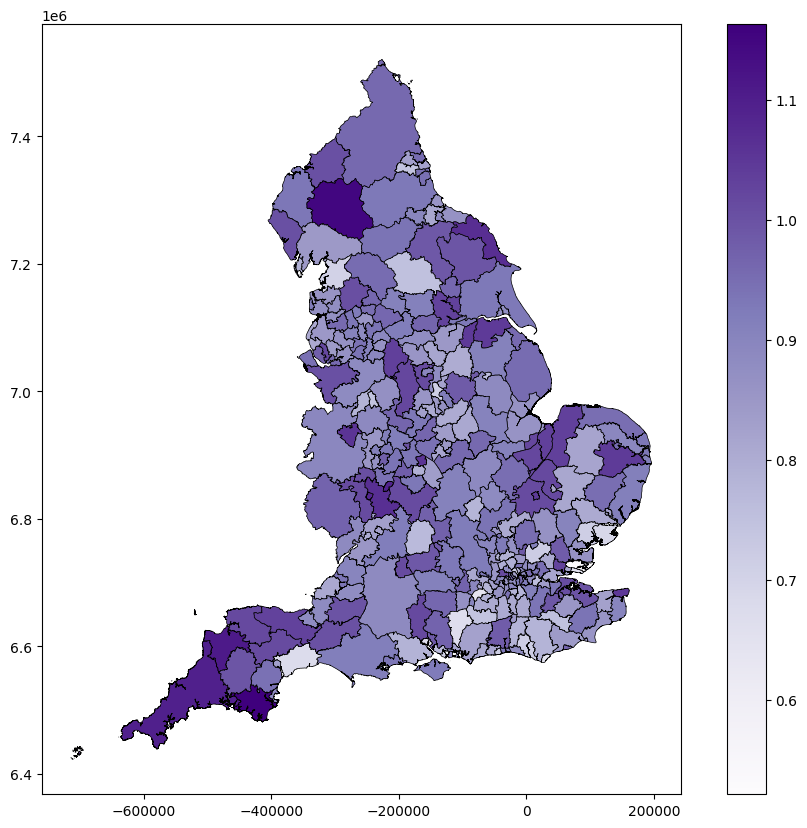

In [7]:
fig, ax = plt.subplots(figsize=(12,10))
df_model_results.plot(ax=ax, column='diagnosis_gap', edgecolor='black', linewidth=0.5, alpha=1.0, cmap='Purples', legend=True)
plt.show()

### Geopandas plot for the residuals of the multiple linear regression model 

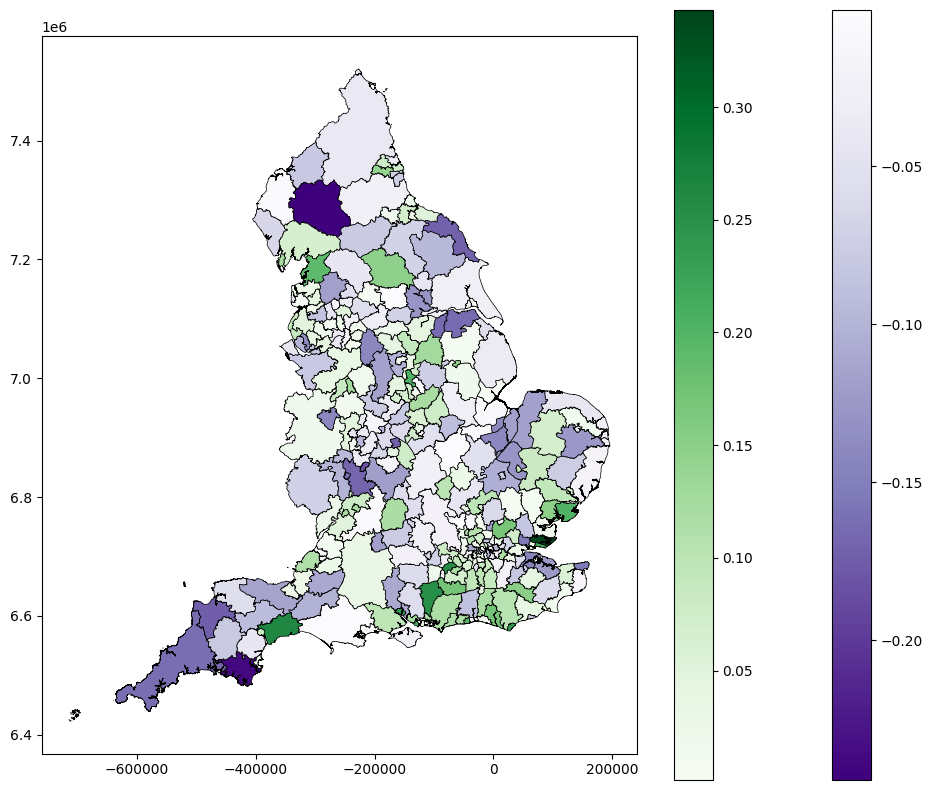

In [8]:
fig, ax = plt.subplots(figsize=(12,10))
df_model_results[df_model_results.reg_model_residuals <=0 ].plot(ax=ax, column='reg_model_residuals', edgecolor='black', linewidth=0.5, alpha=1.0, cmap='Purples_r', legend=True)
df_model_results[df_model_results.reg_model_residuals >=0 ].plot(ax=ax, column='reg_model_residuals', edgecolor='black', linewidth=0.5, alpha=1.0, cmap='Greens', legend=True)
plt.show()

### Geopandas plot for the residuals of the multiple linear regression model trained on the least deprived regions (according to the IMD)

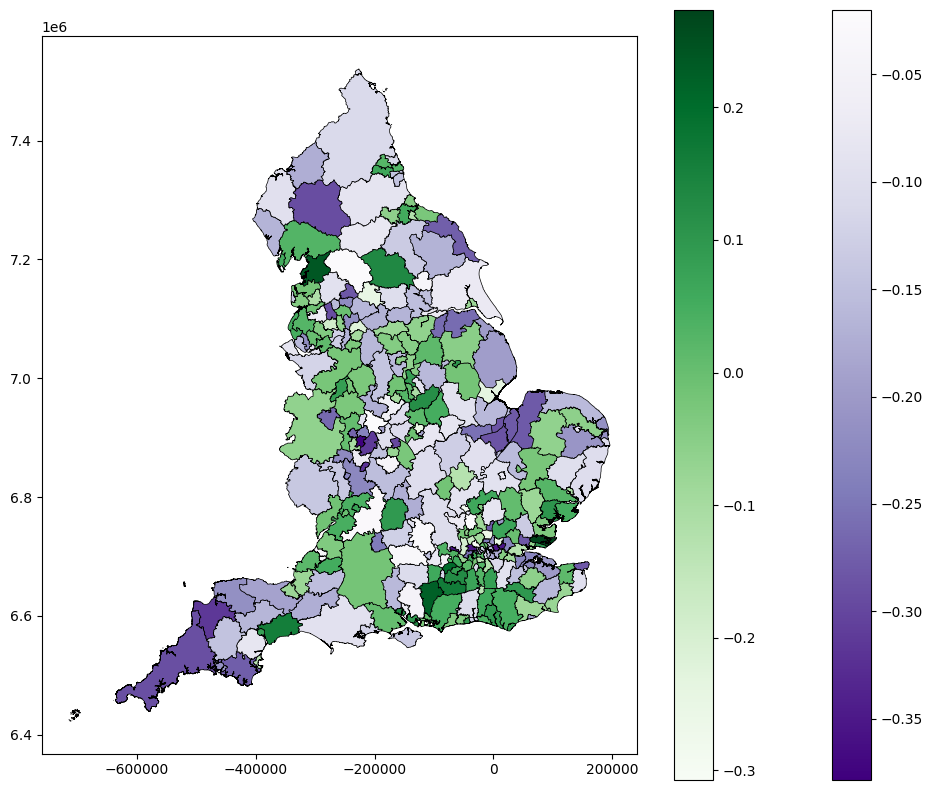

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
df_model_results[df_model_results.reg_model_residuals <=0 ].plot(ax=ax, column='IMD_reg_model_residuals', edgecolor='black', linewidth=0.5, alpha=1.0, cmap='Purples_r', legend=True)
df_model_results[df_model_results.reg_model_residuals >=0 ].plot(ax=ax, column='IMD_reg_model_residuals', edgecolor='black', linewidth=0.5, alpha=1.0, cmap='Greens', legend=True)
plt.show()

## Regions of underdiagnosis

The linear regression model resulted in a prediction of diagnosis - meaning we can consider regions (LADs) with under-diagnosis. 

1. 
2. 
3. 
4. 
5.

## Other measures

We can think about regional deprivation not just in terms of the number of diagnoses, but also about how good that diagnosis is, and how good treatment is post diagnosis. 

* How well the region's diagnosis rates recovered post covid. This could be a good measure of how robust the health service is in the area. 
* What percentage of people with dementia diagnoses receive a differential diagnosis in the region. A differential diagnosis is necessary for tailoring care treatment and administering drugs. 
* How many GPs there are in the region. This is both a proxy for how rural the area might be, and also how good the helathcare services are in the area. 
* How the regions rank on the IMD - this is useful as the IMD is routeinely used to compare regions deprivation. 
* How many memory clinics there are in the area - I have submitted an FOI to try and find this out... 
* How the regions are prescribing drugs - however this dataset is MASSIVE and will take some work to analyse. 